# 웨이퍼 합격/불합격 분류
- –1은 합격에 해당하고 1은 불합격에 해당
- 데이터 타임 스탬프는 해당 특정 시험 지점을 의미

# 환경설정

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset` 디렉토리에 있는 `uci-secom.csv` 파일을 읽어오세요.
 - 상위 5개 샘플(행) 조회

In [2]:
# 코드를 입력해 주세요
data = pd.read_csv('/mnt/elice/dataset/uci-secom.csv') 
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


- Pass/Fail 컬럼의 값별 개수를 계산하세요.

In [3]:
# 코드를 입력해 주세요
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

### 결측치 처리

* 열 별 결측치 개수를 출력하세요

In [4]:
# 코드를 입력해 주세요
data.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

- 열별 결측치 개수 계산 결과의 분포를 시각화 하세요.

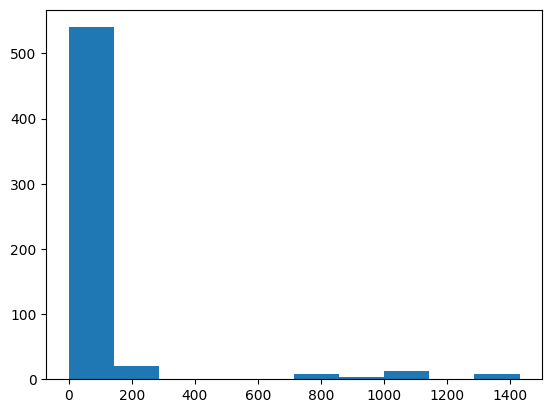

In [5]:
# 코드를 입력해 주세요
plt.hist(data.isna().sum())
plt.show()

- 열별 결측치 개수 계산 결과의 기술 통계를 계산하세요.

In [6]:
# 코드를 입력해 주세요
data.isna().sum().describe()

count     592.000000
mean       70.863176
std       241.476304
min         0.000000
25%         2.000000
50%         6.000000
75%         9.000000
max      1429.000000
dtype: float64

* 전체 na 개수를 출력하세요

In [7]:
# 코드를 입력해 주세요
data.isna().sum().sum()

41951

* 데이터프레임 정보를 출력하세요
    - 각 컬럼별 데이터 개수와 데이터 타입을 조회하세요.
    - verbose=True, show_counts=True로 설정하세요.

In [8]:
# 코드를 입력해 주세요
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 592 columns):
 #    Column     Non-Null Count  Dtype  
---   ------     --------------  -----  
 0    Time       1567 non-null   object 
 1    0          1561 non-null   float64
 2    1          1560 non-null   float64
 3    2          1553 non-null   float64
 4    3          1553 non-null   float64
 5    4          1553 non-null   float64
 6    5          1553 non-null   float64
 7    6          1553 non-null   float64
 8    7          1558 non-null   float64
 9    8          1565 non-null   float64
 10   9          1565 non-null   float64
 11   10         1565 non-null   float64
 12   11         1565 non-null   float64
 13   12         1565 non-null   float64
 14   13         1564 non-null   float64
 15   14         1564 non-null   float64
 16   15         1564 non-null   float64
 17   16         1564 non-null   float64
 18   17         1564 non-null   float64
 19   18         1564 non-null 

* 결측치를 0으로 채운 후 전체 결측치 개수를 출력하세요

In [9]:
# 코드를 입력해 주세요
data = data.fillna(0)
data.isna().sum().sum()

0

### 추가 데이터 처리

* 불필요한 'Time' 열을 삭제한 후 크기(Shape)를 조회하세요

In [10]:
# 코드를 입력해 주세요
data = data.drop('Time',axis=1)
data.shape

(1567, 591)

### ML

* 학습을 위해 x와 y를 추출하세요
* y는 'Pass/Fail' 열이고, x는 'Pass/Fail'을 제외한 나머지 열입니다.

In [11]:
# 코드를 입력해 주세요
x=data.iloc[:, :-1]
y=data.iloc[:, -1]
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


* X 데이터에 대해 Standard Scaling (표준화)를 적용하세요

In [12]:
# 코드를 입력해 주세요
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

* 표준화된 X 데이터를 train과 test로 분할하세요
* 비율은 8:2로 지정합니다. (test_size = 0.2)
* 층화 추출을 설정하세요 (stratify=y)

In [13]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(x_scaled, y ,test_size = 0.2,
                                                     random_state=0, stratify=y )

print("shape of x_train:", X_train.shape)
print("shape of x_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (1253, 590)
shape of x_test: (314, 590)
shape of y_train: (1253,)
shape of y_test: (314,)


* 로지스틱 회귀 알고리즘을 적용하고 score를 출력하세요
* max_iter=1000

In [14]:
# 코드를 입력해 주세요
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000).fit(X_train,y_train)
print('train : {:.3f}, test : {:.3f}' .format(lg.score(X_train,y_train),
                                              lg.score(X_test,y_test)))

train : 0.989, test : 0.889


* 학습된 모델을 이용하여 x_test 데이터에 결과를 예측하고 출력하세요

In [15]:
# 코드를 입력해 주세요
y_pred = lg.predict(X_test)
print("y_pred",y_pred)

y_pred [-1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1
 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


- x_test 데이터에 대해 classification_report 결과를 출력하세요.

In [16]:
# 코드를 입력해 주세요
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       293
           1       0.18      0.19      0.19        21

    accuracy                           0.89       314
   macro avg       0.56      0.56      0.56       314
weighted avg       0.89      0.89      0.89       314

